In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [86]:
data = pd.read_csv('/kaggle/input/credit-card-fraud-detection/train.csv', index_col=0)

data.head()

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


# EDA

In [87]:
data.describe()

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,49785.422340,0.069456,-0.003674,0.739860,0.104810,-0.254623,0.151934,-0.165443,0.166254,-0.127198,...,-0.032077,-0.068876,-0.059646,-0.000776,0.161152,0.021575,0.014138,0.020323,71.065194,0.001793
std,18733.655609,1.346553,1.161502,1.012801,1.230909,1.048268,1.182964,0.802668,0.691267,0.999294,...,0.404916,0.573755,0.323272,0.584270,0.385175,0.473795,0.223692,0.163429,158.712510,0.042310
min,0.000000,-22.173926,-44.247914,-19.088980,-5.069484,-21.090735,-25.659750,-31.179799,-28.903442,-8.756951,...,-14.689621,-7.351378,-11.958588,-2.827444,-3.958591,-1.413857,-9.234767,-4.454059,0.000000,0.000000
25%,39411.000000,-0.844248,-0.621724,0.181373,-0.738399,-0.912254,-0.590892,-0.667139,-0.078114,-0.738270,...,-0.185077,-0.464426,-0.177546,-0.321495,-0.078682,-0.310948,-0.044800,0.001623,6.990000,0.000000
50%,53785.000000,0.671327,0.003677,0.826497,0.095342,-0.322525,-0.068690,-0.144551,0.125052,-0.171789,...,-0.044828,-0.045844,-0.068170,0.043048,0.181701,-0.087927,0.017590,0.024098,24.900000,0.000000
75%,63833.000000,1.171271,0.753340,1.360362,0.967657,0.242796,0.492931,0.334553,0.396056,0.469904,...,0.100896,0.309938,0.047399,0.388969,0.425791,0.269844,0.073776,0.065778,74.000000,0.000000
max,73899.000000,2.390816,16.068473,6.145578,12.547997,34.581260,15.082516,23.256066,18.270586,8.083661,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.119824,6.457839,23.263746,6513.350000,1.000000


In [88]:
data_isNotFraud = data[data.IsFraud == 0]
data_isNotFraud.describe()

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
count,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,...,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,149731.0
mean,49788.772485,0.071432,-0.003681,0.742017,0.103579,-0.254970,0.151912,-0.164784,0.166976,-0.127648,...,-0.032191,-0.068811,-0.059390,-0.000741,0.161137,0.021882,0.014166,0.020130,70.934880,0.0
std,18730.509645,1.340887,1.148230,1.005616,1.229518,1.045155,1.181733,0.795076,0.684981,0.998158,...,0.402616,0.573386,0.319563,0.584182,0.384668,0.473797,0.221692,0.151262,157.612117,0.0
min,0.000000,-22.173926,-32.167577,-18.402416,-5.069484,-21.090735,-25.659750,-31.179799,-28.903442,-7.012835,...,-14.689621,-7.351378,-11.958588,-2.827444,-2.717086,-1.413857,-8.250179,-4.454059,0.000000,0.0
25%,39412.000000,-0.843543,-0.622231,0.182600,-0.738768,-0.912286,-0.590823,-0.666917,-0.077895,-0.738338,...,-0.185025,-0.464354,-0.177528,-0.321379,-0.078590,-0.310858,-0.044838,0.001627,6.990000,0.0
50%,53786.000000,0.673300,0.003307,0.826780,0.094414,-0.322914,-0.068680,-0.144513,0.125274,-0.172061,...,-0.044826,-0.045797,-0.068174,0.043216,0.181712,-0.087813,0.017575,0.024095,24.900000,0.0
75%,63833.000000,1.171324,0.752556,1.361239,0.966980,0.242518,0.492738,0.334533,0.395968,0.469035,...,0.100799,0.309928,0.047271,0.388962,0.425445,0.270039,0.073749,0.065752,74.000000,0.0
max,73899.000000,2.390816,16.068473,6.145578,12.547997,34.581260,15.082516,23.256066,18.270586,8.083661,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.119824,6.457839,6.497578,6513.350000,0.0


In [89]:
data_isFraud = data[data.IsFraud == 1]
data_isFraud.describe()

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0
mean,47920.661710,-1.030089,-0.000097,-0.460729,0.790201,-0.061276,0.163898,-0.531946,-0.235792,0.123385,...,0.031414,-0.105008,-0.202124,-0.020389,0.169813,-0.149424,-0.001242,0.128102,143.600558,1.0
std,20361.998616,3.018477,4.298801,2.771889,1.720484,2.169433,1.741209,2.699695,2.269384,1.485495,...,1.094586,0.751961,1.190138,0.632070,0.605454,0.441608,0.740092,1.467760,463.102697,0.0
min,764.000000,-19.354727,-44.247914,-19.088980,-3.509578,-16.143833,-5.790818,-21.876190,-17.374875,-8.756951,...,-5.166518,-5.109636,-8.895803,-1.746858,-3.958591,-1.016564,-9.234767,-2.244814,0.000000,1.0
25%,37485.000000,-1.722822,-0.241208,-1.159500,-0.072085,-0.811786,-0.804495,-0.845368,-0.273615,-0.633955,...,-0.228274,-0.498945,-0.218881,-0.373627,-0.127880,-0.398479,-0.038702,-0.006871,1.000000,1.0
50%,52667.000000,-0.547002,0.493548,0.087555,0.881365,-0.067252,-0.091246,-0.270726,0.049576,-0.012889,...,-0.050927,-0.058674,-0.059995,-0.021346,0.167769,-0.268099,0.036714,0.029629,10.000000,1.0
75%,63522.000000,1.122965,1.320189,1.058814,1.369713,0.779826,0.711352,0.346729,0.473379,0.868266,...,0.182336,0.316926,0.097118,0.396728,0.534360,0.077801,0.107800,0.121725,59.950000,1.0
max,73885.000000,1.990241,8.435701,3.347067,8.826458,8.839292,7.363600,15.923791,14.073865,5.722274,...,6.367099,2.547260,5.312675,1.079817,2.420944,1.154464,1.937333,23.263746,4471.960000,1.0


In [90]:
data.isna().sum()

Time                  0
feat1                 0
feat2                 0
feat3                 0
feat4                 0
feat5                 0
feat6                 0
feat7                 0
feat8                 0
feat9                 0
feat10                0
feat11                0
feat12                0
feat13                0
feat14                0
feat15                0
feat16                0
feat17                0
feat18                0
feat19                0
feat20                0
feat21                0
feat22                0
feat23                0
feat24                0
feat25                0
feat26                0
feat27                0
feat28                0
Transaction_Amount    0
IsFraud               0
dtype: int64

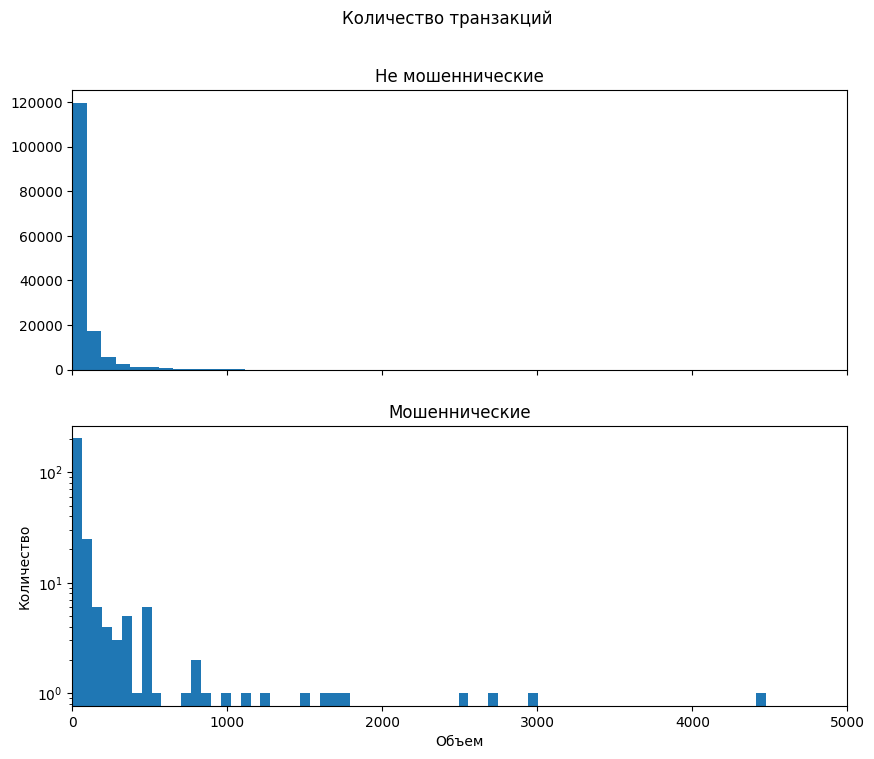

In [91]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8), sharex = True)
ax1.hist(data_isNotFraud.Transaction_Amount, bins=70)
ax1.set_title('Не мошеннические')

ax2.hist(data_isFraud.Transaction_Amount, bins=70)
ax2.set_title('Мошеннические')

f.suptitle("Количество транзакций")
plt.xlabel("Объем")
plt.ylabel("Количество")

plt.xlim(0,5000)
plt.yscale('log')
plt.show()

<Axes: xlabel='IsFraud', ylabel='count'>

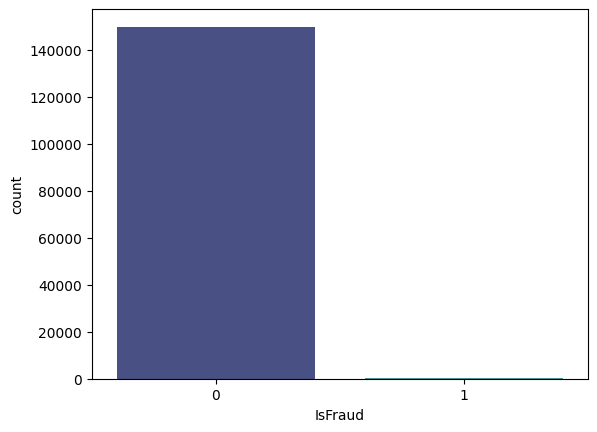

In [92]:
sns.countplot(x='IsFraud', data=data, palette='mako')

In [93]:
data.IsFraud.value_counts()

IsFraud
0    149731
1       269
Name: count, dtype: int64

In [94]:
selected_features = [f'feat{i}' for i in range(1, 29)]
correlations = data[selected_features].corr()

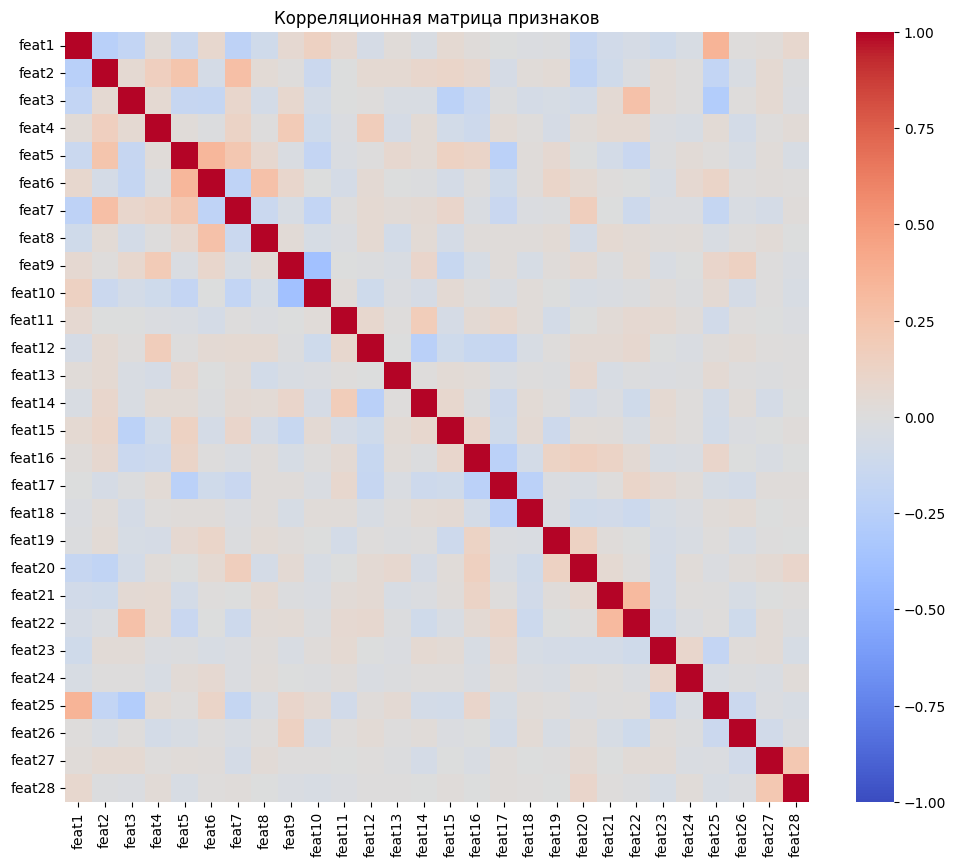

In [95]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Корреляционная матрица признаков')
plt.show()

# Features Scaling

In [96]:
X = data.drop(columns=['IsFraud'])
y = data['IsFraud']

feat_cols = [f'feat{i}' for i in range(1, 29)]
other_cols = [column for column in X if column not in feat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('standart', StandardScaler(), feat_cols),
        ('minmax', MinMaxScaler(), other_cols)
    ]
)

pca = PCA(n_components=0.95)

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca)])

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_val_preprocessed = preprocessing_pipeline.transform(X_val)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [97]:
smote = SMOTE(random_state=42)

X_train_preprocessed, y_train = smote.fit_resample(X_train_preprocessed, y_train)

# Logistic Regression

In [98]:
model_lr = LogisticRegression()
model_lr.fit(X_train_preprocessed, y_train)

y_val_lr = model_lr.predict(X_val_preprocessed)

print(classification_report(y_val, y_val_lr))
print(confusion_matrix(y_val, y_val_lr))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     26952
           1       0.00      0.69      0.01        48

    accuracy                           0.73     27000
   macro avg       0.50      0.71      0.43     27000
weighted avg       1.00      0.73      0.84     27000

[[19775  7177]
 [   15    33]]


In [99]:
y_test_lr = model_lr.predict(X_test_preprocessed)

print(classification_report(y_test, y_test_lr))
print(confusion_matrix(y_test, y_test_lr))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     14973
           1       0.00      0.67      0.01        27

    accuracy                           0.73     15000
   macro avg       0.50      0.70      0.43     15000
weighted avg       1.00      0.73      0.84     15000

[[10981  3992]
 [    9    18]]


# XGBClassifier

In [100]:
model_xgb = xgb.XGBClassifier(booster='gbtree', max_depth=1, n_estimators=100)
model_xgb.fit(X_train_preprocessed, y_train)

y_val_xgb = model_xgb.predict(X_val_preprocessed)

print(classification_report(y_val, y_val_xgb))
print(confusion_matrix(y_val, y_val_xgb))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     26952
           1       0.01      0.69      0.01        48

    accuracy                           0.78     27000
   macro avg       0.50      0.74      0.44     27000
weighted avg       1.00      0.78      0.88     27000

[[21120  5832]
 [   15    33]]


In [101]:
y_test_xgb = model_xgb.predict(X_test_preprocessed)

print(classification_report(y_test, y_test_xgb))
print(confusion_matrix(y_test, y_test_xgb))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     14973
           1       0.00      0.56      0.01        27

    accuracy                           0.78     15000
   macro avg       0.50      0.67      0.44     15000
weighted avg       1.00      0.78      0.88     15000

[[11723  3250]
 [   12    15]]


# AdaBoost

In [102]:
base_estimator = DecisionTreeClassifier(max_depth=1)
model_ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)
model_ada.fit(X_train_preprocessed, y_train)

y_val_ada = model_ada.predict(X_val_preprocessed)

print(classification_report(y_val, y_val_ada))
print(confusion_matrix(y_val, y_val_ada))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     26952
           1       0.00      0.69      0.01        48

    accuracy                           0.75     27000
   macro avg       0.50      0.72      0.43     27000
weighted avg       1.00      0.75      0.85     27000

[[20179  6773]
 [   15    33]]


In [103]:
y_test_ada = model_ada.predict(X_test_preprocessed)

print(classification_report(y_test, y_test_ada))
print(confusion_matrix(y_test, y_test_ada))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     14973
           1       0.00      0.59      0.01        27

    accuracy                           0.75     15000
   macro avg       0.50      0.67      0.43     15000
weighted avg       1.00      0.75      0.86     15000

[[11247  3726]
 [   11    16]]
